In [1]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# choose a dataset to look at
with open(r'./data/patient_gumbel4.pickle', 'rb') as handle:
    patient_dict = pickle.load(handle)

In [3]:
# compute average number of nodes and edges
avg_nodes = 0
avg_edges = 0
for k in patient_dict.keys():
    for G in patient_dict[k]:
        avg_nodes += len(G.nodes)
        avg_edges += len(G.edges)
print(avg_nodes/50, avg_edges/50)

250.0 908.26


In [4]:
def graph_visualization(graphs):
    fig, axes = plt.subplots(1, 5, figsize = (20, 3.5))
    for i,G in enumerate(graphs):
        posDict = nx.get_node_attributes(G, 'pos')
        for label in nodeColorsDict:
            plt.plot([0], [0], color=nodeColorsDict[label], label=label)
        nodeColorList = [nodeColorsDict[i] for i in list(nx.get_node_attributes(G, 'cell_types').values())]
        nx.draw_networkx(G, pos=posDict, with_labels=False, node_size=30, node_color=nodeColorList, ax=axes[i])
     

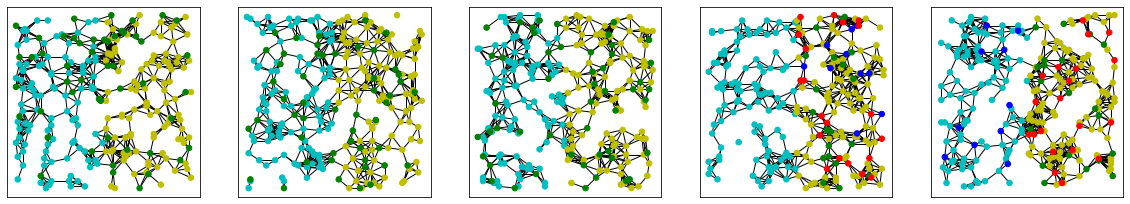

In [5]:
nodeColorsDict = {'CD3p': 'b', 'CD3p_CD4p': 'g', 'CD8p_CD3p': 'r', 'Tumor': 'c', 'Stroma': 'y'}
graph_visualization(patient_dict['0001'])
plt.savefig('./img/gv2.png')